In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
rcParams['figure.figsize'] = 10,10
sns.set_style('whitegrid')

In [2]:
#Read data set
data_set = pd.read_csv('TDD_CELL_SUMMARY_WEEK2022_13.csv')
data_set.head()

,DL_AVG_THROUGHPUT_KBPS,UL_AVG_THROUGHPUT_KBPS,AVG_DL_TRAFFIC_VOLUME_MB,AVG_UL_TRAFFIC_VOLUME_MB,L_TRAFFIC_USER_AVG,L_TRAFFIC_USER_MAX,AVG_DL_RES_BLOCK_UTILIZATION,AVG_UL_RES_BLOCK_UTILIZATION,AVG_D_TOT_DL_TRAFFIC_VOLUME_GB,MIMO_CONFIGURATION,INTERFERENCE_AVAILABLE,NO_OF_HOURS_INTERFERRED
0,16176.26,4597.15,5195.56,630.15,32.35,38.39,0.4354,0.5956,30.25,4T4R,NO,0
1,11315.17,4259.32,6512.39,983.08,47.29,54.46,0.5385,0.6970,44.91,2T2R,NO,0
2,14834.31,4513.86,2622.61,433.79,19.12,23.86,0.3241,0.4391,18.05,4T4R,NO,0
3,15852.17,4168.22,5828.86,777.85,44.06,51.14,0.4425,0.6064,50.08,4T4R,NO,0
4,23142.26,4665.91,2875.58,538.69,23.62,29.04,0.2402,0.4797,32.05,4T4R,NO,0


In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14895 entries, 0 to 14894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DL_AVG_THROUGHPUT_KBPS          14890 non-null  float64
 1   UL_AVG_THROUGHPUT_KBPS          14891 non-null  float64
 2   AVG_DL_TRAFFIC_VOLUME_MB        14895 non-null  float64
 3   AVG_UL_TRAFFIC_VOLUME_MB        14895 non-null  float64
 4   L_TRAFFIC_USER_AVG              14895 non-null  float64
 5   L_TRAFFIC_USER_MAX              14895 non-null  float64
 6   AVG_DL_RES_BLOCK_UTILIZATION    14893 non-null  float64
 7   AVG_UL_RES_BLOCK_UTILIZATION    14893 non-null  float64
 8   AVG_D_TOT_DL_TRAFFIC_VOLUME_GB  14881 non-null  float64
 9   MIMO_CONFIGURATION              14895 non-null  object 
 10  INTERFERENCE_AVAILABLE          14895 non-null  object 
 11  NO_OF_HOURS_INTERFERRED         14895 non-null  int64  
dtypes: float64(9), int64(1), object(

In [4]:
# drop null value row boz there is small amount records with null, therefore it not give much affect to the final model
#(~1% with null)
clean_df = data_set.dropna()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14878 entries, 0 to 14894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DL_AVG_THROUGHPUT_KBPS          14878 non-null  float64
 1   UL_AVG_THROUGHPUT_KBPS          14878 non-null  float64
 2   AVG_DL_TRAFFIC_VOLUME_MB        14878 non-null  float64
 3   AVG_UL_TRAFFIC_VOLUME_MB        14878 non-null  float64
 4   L_TRAFFIC_USER_AVG              14878 non-null  float64
 5   L_TRAFFIC_USER_MAX              14878 non-null  float64
 6   AVG_DL_RES_BLOCK_UTILIZATION    14878 non-null  float64
 7   AVG_UL_RES_BLOCK_UTILIZATION    14878 non-null  float64
 8   AVG_D_TOT_DL_TRAFFIC_VOLUME_GB  14878 non-null  float64
 9   MIMO_CONFIGURATION              14878 non-null  object 
 10  INTERFERENCE_AVAILABLE          14878 non-null  object 
 11  NO_OF_HOURS_INTERFERRED         14878 non-null  int64  
dtypes: float64(9), int64(1), object(

In [5]:
clean_df

,DL_AVG_THROUGHPUT_KBPS,UL_AVG_THROUGHPUT_KBPS,AVG_DL_TRAFFIC_VOLUME_MB,AVG_UL_TRAFFIC_VOLUME_MB,L_TRAFFIC_USER_AVG,L_TRAFFIC_USER_MAX,AVG_DL_RES_BLOCK_UTILIZATION,AVG_UL_RES_BLOCK_UTILIZATION,AVG_D_TOT_DL_TRAFFIC_VOLUME_GB,MIMO_CONFIGURATION,INTERFERENCE_AVAILABLE,NO_OF_HOURS_INTERFERRED
0,16176.26,4597.15,5195.56,630.15,32.35,38.39,0.4354,0.5956,30.25,4T4R,NO,0
1,11315.17,4259.32,6512.39,983.08,47.29,54.46,0.5385,0.6970,44.91,2T2R,NO,0
2,14834.31,4513.86,2622.61,433.79,19.12,23.86,0.3241,0.4391,18.05,4T4R,NO,0
3,15852.17,4168.22,5828.86,777.85,44.06,51.14,0.4425,0.6064,50.08,4T4R,NO,0
4,23142.26,4665.91,2875.58,538.69,23.62,29.04,0.2402,0.4797,32.05,4T4R,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14890,16113.28,2948.85,3740.71,312.11,16.45,22.29,0.3538,0.4632,34.51,4T4R,NO,0
14891,11726.77,3362.23,4123.08,379.91,16.93,24.71,0.4897,0.4778,49.01,4T4R,NO,0
14892,7203.69,2721.72,3329.07,329.26,20.40,31.46,0.5917,0.6743,55.10,4T4R,NO,0
14893,12257.91,4379.28,4221.33,527.36,14.13,20.07,0.4715,0.4847,39.97,4T4R,NO,0


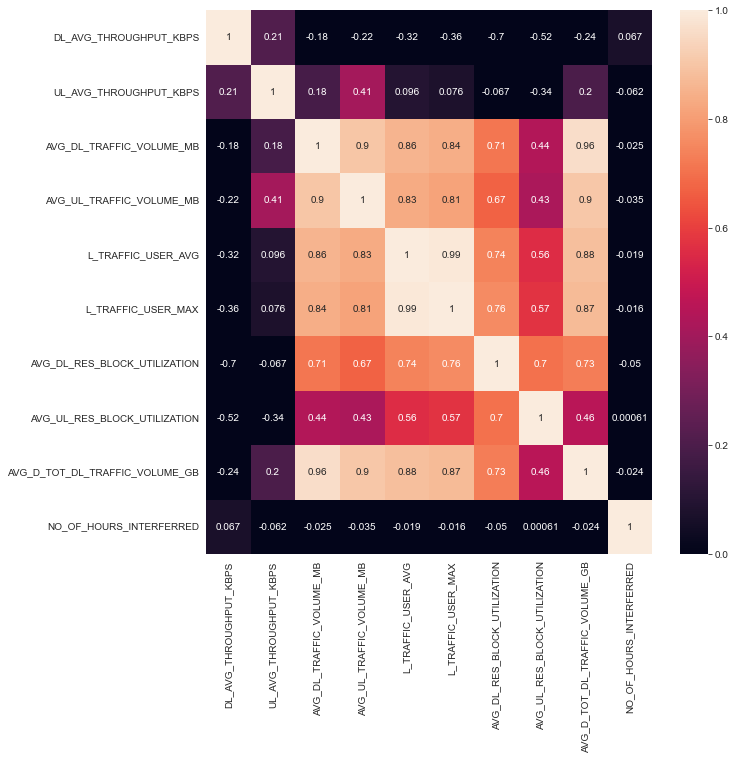

In [6]:
corr = clean_df.corr()

ax1 = sns.heatmap(corr, vmin=0, vmax=1, annot = True)
plt.show()

<AxesSubplot:xlabel='DL_AVG_THROUGHPUT_KBPS', ylabel='NO_OF_HOURS_INTERFERRED'>

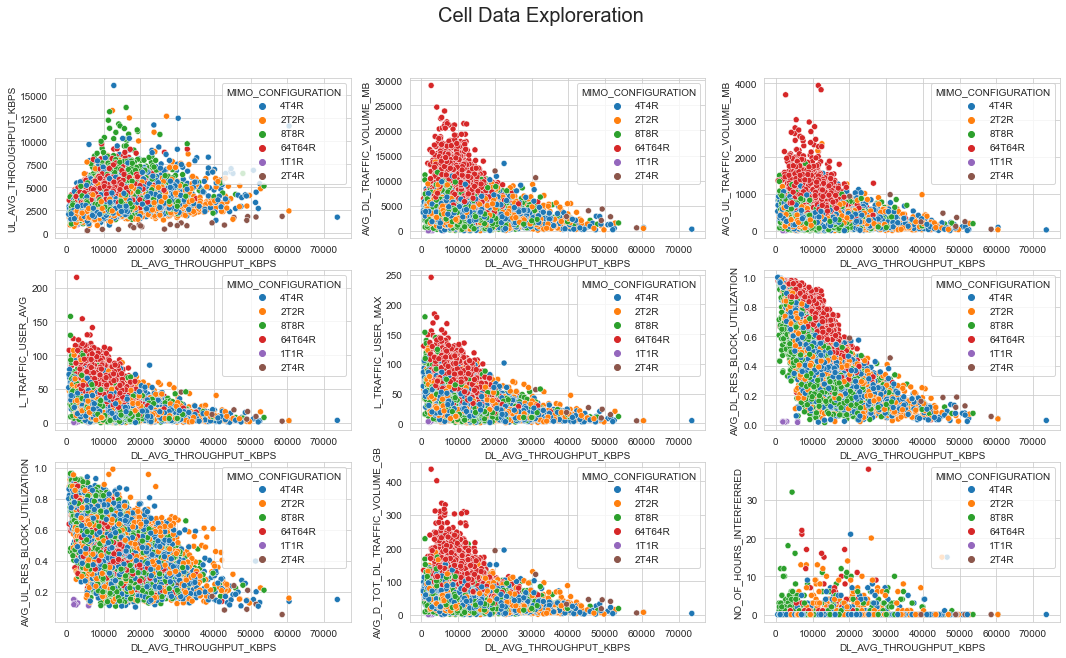

In [7]:
fig, axes = plt.subplots(3,3, figsize = (18,10))

fig.suptitle ('Cell Data Exploreration', fontsize =20)

sns.scatterplot(ax=axes[0,0], data=clean_df, x='DL_AVG_THROUGHPUT_KBPS', y='UL_AVG_THROUGHPUT_KBPS', hue = 'MIMO_CONFIGURATION')
sns.scatterplot(ax=axes[0,1], data=clean_df, x='DL_AVG_THROUGHPUT_KBPS', y='AVG_DL_TRAFFIC_VOLUME_MB', hue = 'MIMO_CONFIGURATION')
sns.scatterplot(ax=axes[0,2], data=clean_df, x='DL_AVG_THROUGHPUT_KBPS', y='AVG_UL_TRAFFIC_VOLUME_MB', hue = 'MIMO_CONFIGURATION')
sns.scatterplot(ax=axes[1,0], data=clean_df, x='DL_AVG_THROUGHPUT_KBPS', y='L_TRAFFIC_USER_AVG', hue = 'MIMO_CONFIGURATION')
sns.scatterplot(ax=axes[1,1], data=clean_df, x='DL_AVG_THROUGHPUT_KBPS', y='L_TRAFFIC_USER_MAX', hue = 'MIMO_CONFIGURATION')
sns.scatterplot(ax=axes[1,2], data=clean_df, x='DL_AVG_THROUGHPUT_KBPS', y='AVG_DL_RES_BLOCK_UTILIZATION', hue = 'MIMO_CONFIGURATION')
sns.scatterplot(ax=axes[2,0], data=clean_df, x='DL_AVG_THROUGHPUT_KBPS', y='AVG_UL_RES_BLOCK_UTILIZATION', hue = 'MIMO_CONFIGURATION')
sns.scatterplot(ax=axes[2,1], data=clean_df, x='DL_AVG_THROUGHPUT_KBPS', y='AVG_D_TOT_DL_TRAFFIC_VOLUME_GB', hue = 'MIMO_CONFIGURATION')
sns.scatterplot(ax=axes[2,2], data=clean_df, x='DL_AVG_THROUGHPUT_KBPS', y='NO_OF_HOURS_INTERFERRED', hue = 'MIMO_CONFIGURATION')





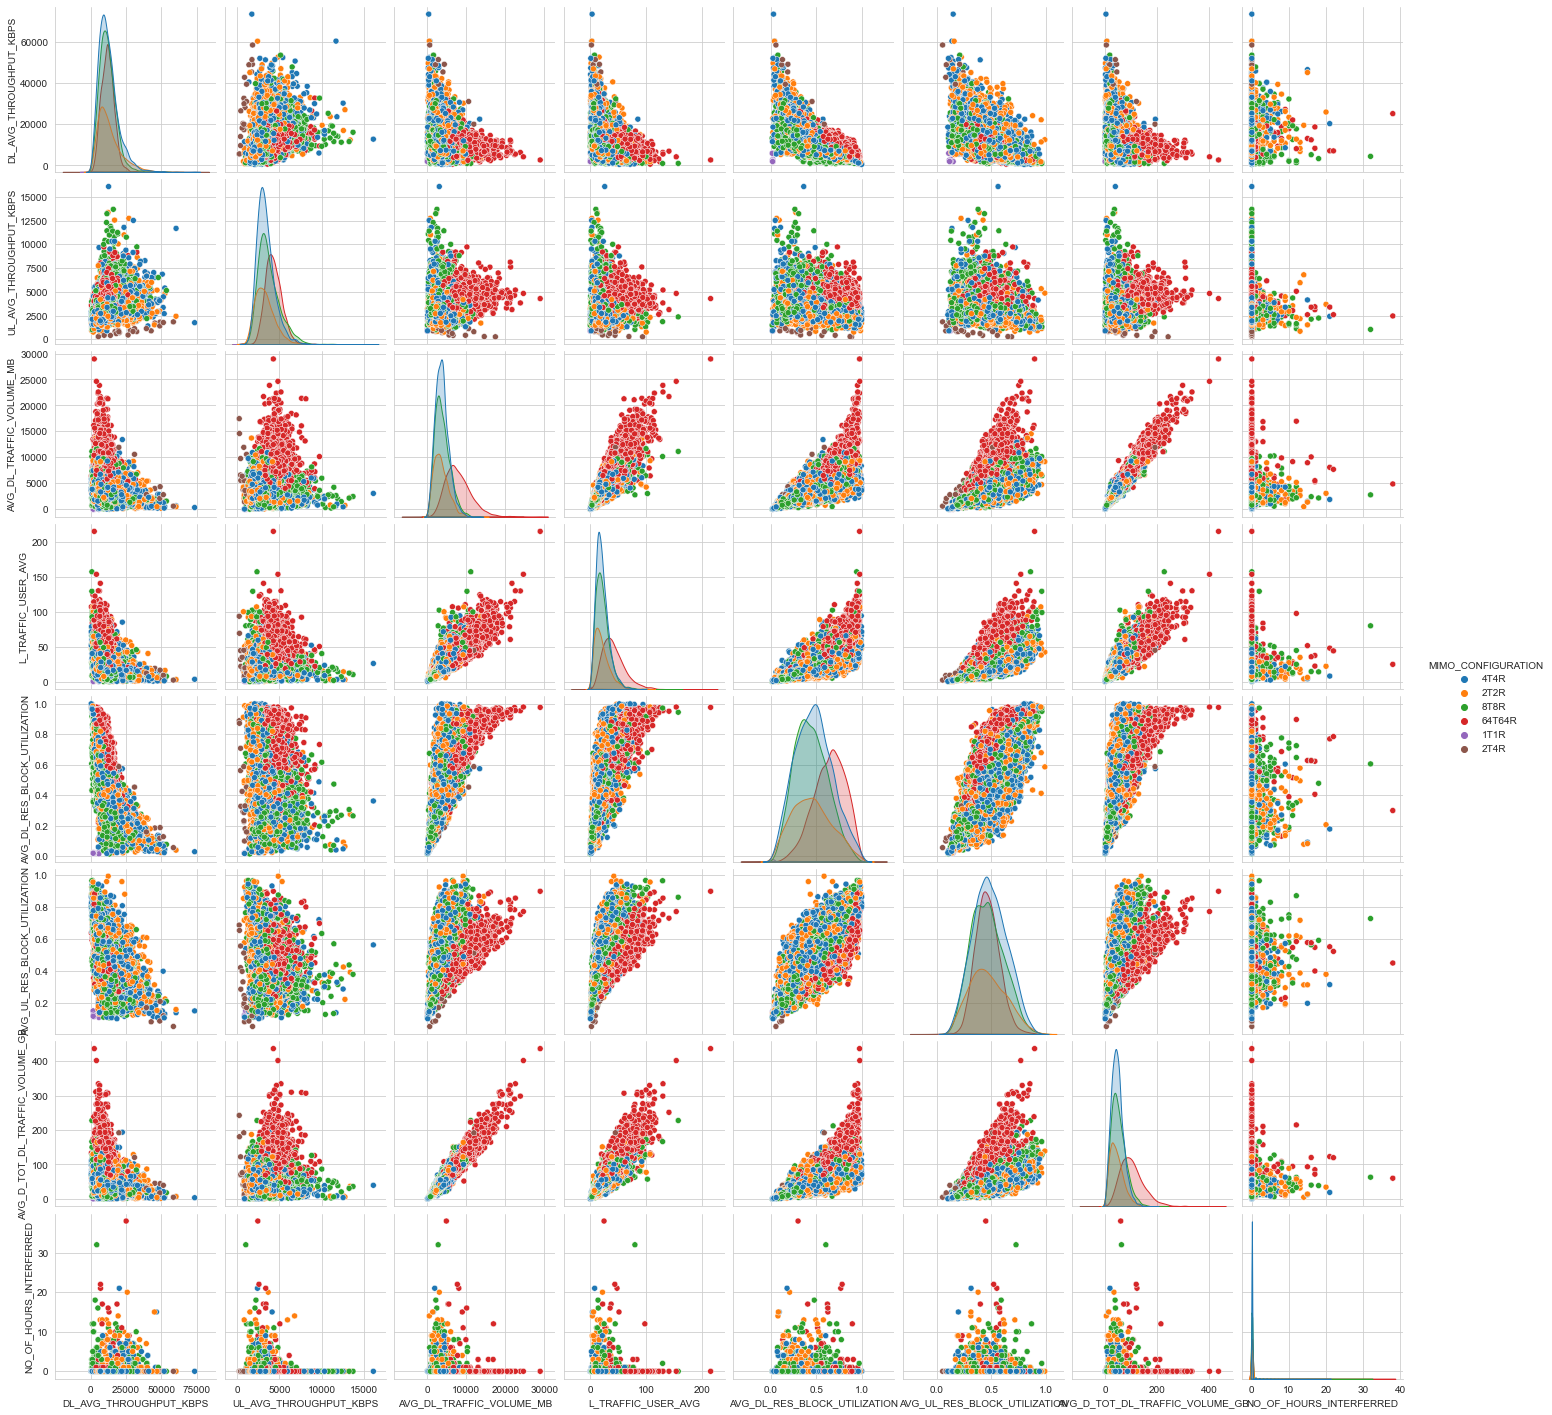

In [8]:
pairplotdata = pd.DataFrame(clean_df.drop(columns =['INTERFERENCE_AVAILABLE','L_TRAFFIC_USER_MAX','AVG_UL_TRAFFIC_VOLUME_MB']))
g = sns.pairplot(pairplotdata, hue='MIMO_CONFIGURATION')

<AxesSubplot:xlabel='AVG_DL_TRAFFIC_VOLUME_MB', ylabel='AVG_UL_TRAFFIC_VOLUME_MB'>

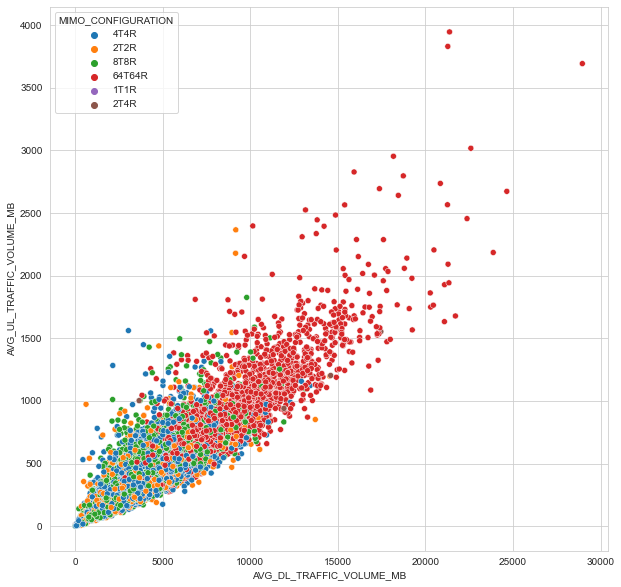

In [9]:
sns.scatterplot(x='AVG_DL_TRAFFIC_VOLUME_MB', y='AVG_UL_TRAFFIC_VOLUME_MB', hue ='MIMO_CONFIGURATION', data=clean_df)

<AxesSubplot:xlabel='L_TRAFFIC_USER_AVG', ylabel='L_TRAFFIC_USER_MAX'>

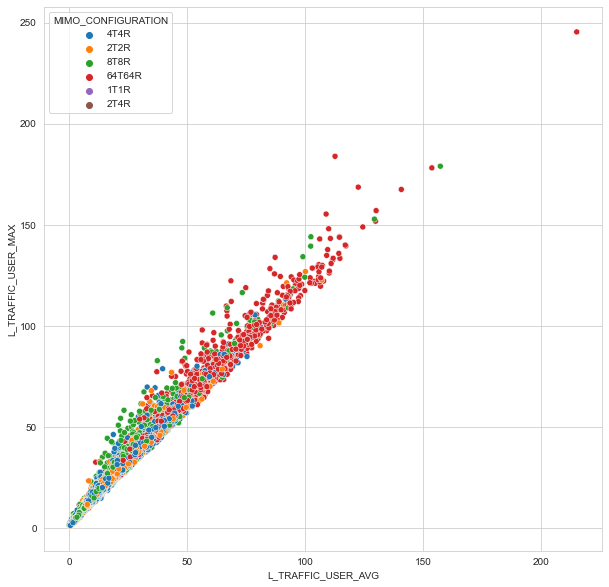

In [10]:
sns.scatterplot(x='L_TRAFFIC_USER_AVG', y='L_TRAFFIC_USER_MAX', hue ='MIMO_CONFIGURATION', data=clean_df)

### One hot endcoding

In [11]:
cell_interference= pd.get_dummies(clean_df.INTERFERENCE_AVAILABLE, prefix ='interference')
Mimo_config= pd.get_dummies(clean_df.MIMO_CONFIGURATION, prefix ='MIMO_CONFIG')

#### convert target value into binary

In [12]:
clean_df['congested'] = np.where(clean_df['AVG_DL_RES_BLOCK_UTILIZATION'] >= 0.8, 1, 0)

In [13]:
unwanted_colum_dp = pd.concat([clean_df.drop(['AVG_DL_RES_BLOCK_UTILIZATION','L_TRAFFIC_USER_MAX','AVG_UL_TRAFFIC_VOLUME_MB','INTERFERENCE_AVAILABLE','MIMO_CONFIGURATION'],axis=1), cell_interference],axis=1)
unwanted_colum_dp_1 = pd.concat([unwanted_colum_dp,Mimo_config],axis=1)

In [14]:
unwanted_colum_dp_1.congested.value_counts()

0    13643
1     1235
Name: congested, dtype: int64

In [15]:
unwanted_colum_dp_1.columns

Index(['DL_AVG_THROUGHPUT_KBPS', 'UL_AVG_THROUGHPUT_KBPS',
       'AVG_DL_TRAFFIC_VOLUME_MB', 'L_TRAFFIC_USER_AVG',
       'AVG_UL_RES_BLOCK_UTILIZATION', 'AVG_D_TOT_DL_TRAFFIC_VOLUME_GB',
       'NO_OF_HOURS_INTERFERRED', 'congested', 'interference_NO',
       'interference_YES', 'MIMO_CONFIG_1T1R', 'MIMO_CONFIG_2T2R',
       'MIMO_CONFIG_2T4R', 'MIMO_CONFIG_4T4R', 'MIMO_CONFIG_64T64R',
       'MIMO_CONFIG_8T8R'],
      dtype='object')

In [16]:
catogorical_feature_list = [ 'interference_NO',
       'interference_YES', 'MIMO_CONFIG_1T1R', 'MIMO_CONFIG_2T2R',
       'MIMO_CONFIG_2T4R', 'MIMO_CONFIG_4T4R', 'MIMO_CONFIG_64T64R',
       'MIMO_CONFIG_8T8R']
cat_array = np.array(unwanted_colum_dp_1[catogorical_feature_list])
cat_array

array([[1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 0]], dtype=uint8)

In [17]:
label = ['congested']
label_array = np.array(unwanted_colum_dp_1[label])
label_array

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

### Normalized the data - Min Max scaler

In [18]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0,1))
feature_after_min_max_scaler = min_max_scaler.fit_transform(unwanted_colum_dp_1.drop(['congested','interference_NO',
                                                    'interference_YES','MIMO_CONFIG_1T1R','MIMO_CONFIG_2T2R',
                                                    'MIMO_CONFIG_2T4R','MIMO_CONFIG_4T4R','MIMO_CONFIG_64T64R',
                                                                     'MIMO_CONFIG_8T8R'],axis=1))

In [19]:
Min_max_data = np.concatenate([feature_after_min_max_scaler,cat_array,label_array], axis=1)
Min_max_data_final = pd.DataFrame(Min_max_data)
Min_max_data_final.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.214372,0.274006,0.179368,0.149614,0.578576,0.069212,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.147888,0.252663,0.224845,0.219096,0.686979,0.102765,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.196018,0.268744,0.090509,0.088085,0.411268,0.041289,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.209939,0.246908,0.201239,0.204074,0.590122,0.114598,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.309643,0.278350,0.099246,0.109013,0.454672,0.073332,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### Rename all columns

In [20]:
Normalized_data = Min_max_data_final.rename(columns={0:"DL_AVG_THROUGHPUT_KBPS",
                                                    1:"UL_AVG_THROUGHPUT_KBPS",
                                                    2:"AVG_DL_TRAFFIC_VOLUME_MB",
                                                    3:"L_TRAFFIC_USER_AVG",
                                                    4:"AVG_UL_RES_BLOCK_UTILIZATION",
                                                    5:"AVG_D_TOT_DL_TRAFFIC_VOLUME_GB",
                                                    6:"NO_OF_HOURS_INTERFERRED",
                                                    7:"interference_NO",
                                                    8:"interference_YES",
                                                    9:"MIMO_CONFIG_1T1R",
                                                    10:"MIMO_CONFIG_2T2R",
                                                    11:"MIMO_CONFIG_2T4R",
                                                    12:"MIMO_CONFIG_4T4R",
                                                    13:"MIMO_CONFIG_64T64R",
                                                    14:"MIMO_CONFIG_8T8R",
                                                    15:"congested"})
Normalized_data['congested'] = Normalized_data.congested.astype(int)

In [21]:
Normalized_data

,DL_AVG_THROUGHPUT_KBPS,UL_AVG_THROUGHPUT_KBPS,AVG_DL_TRAFFIC_VOLUME_MB,L_TRAFFIC_USER_AVG,AVG_UL_RES_BLOCK_UTILIZATION,AVG_D_TOT_DL_TRAFFIC_VOLUME_GB,NO_OF_HOURS_INTERFERRED,interference_NO,interference_YES,MIMO_CONFIG_1T1R,MIMO_CONFIG_2T2R,MIMO_CONFIG_2T4R,MIMO_CONFIG_4T4R,MIMO_CONFIG_64T64R,MIMO_CONFIG_8T8R,congested
0,0.214372,0.274006,0.179368,0.149614,0.578576,0.069212,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.147888,0.252663,0.224845,0.219096,0.686979,0.102765,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,0.196018,0.268744,0.090509,0.088085,0.411268,0.041289,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,0.209939,0.246908,0.201239,0.204074,0.590122,0.114598,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.309643,0.278350,0.099246,0.109013,0.454672,0.073332,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14873,0.213510,0.169874,0.129124,0.075667,0.437032,0.078962,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
14874,0.153518,0.195989,0.142329,0.077900,0.452641,0.112149,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
14875,0.091657,0.155525,0.114907,0.094038,0.662711,0.126087,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
14876,0.160782,0.260242,0.145722,0.064878,0.460017,0.091458,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


### Handle Imbalance Dataset

#### Split Data as train and test

In [22]:
from sklearn.model_selection import train_test_split
X = Normalized_data.drop(['congested'],axis=1)
y = Normalized_data['congested']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10414, 15), (4464, 15), (10414,), (4464,))

#### SMOTE-NC teachnique

In [23]:
from imblearn.over_sampling import SMOTENC

SMOTENC_X_data = X_train
SMOTENC_y_data = y_train

In [24]:
SMOTENC_X_data.columns

Index(['DL_AVG_THROUGHPUT_KBPS', 'UL_AVG_THROUGHPUT_KBPS',
       'AVG_DL_TRAFFIC_VOLUME_MB', 'L_TRAFFIC_USER_AVG',
       'AVG_UL_RES_BLOCK_UTILIZATION', 'AVG_D_TOT_DL_TRAFFIC_VOLUME_GB',
       'NO_OF_HOURS_INTERFERRED', 'interference_NO', 'interference_YES',
       'MIMO_CONFIG_1T1R', 'MIMO_CONFIG_2T2R', 'MIMO_CONFIG_2T4R',
       'MIMO_CONFIG_4T4R', 'MIMO_CONFIG_64T64R', 'MIMO_CONFIG_8T8R'],
      dtype='object')

In [25]:
#Define numberical columns
num_column = ['DL_AVG_THROUGHPUT_KBPS', 'UL_AVG_THROUGHPUT_KBPS',
       'AVG_DL_TRAFFIC_VOLUME_MB', 'L_TRAFFIC_USER_AVG',
       'AVG_UL_RES_BLOCK_UTILIZATION', 'AVG_D_TOT_DL_TRAFFIC_VOLUME_GB',
       'NO_OF_HOURS_INTERFERRED']

In [26]:
cat_col_index = list(range(len(num_column),15))
cat_col_index

[7, 8, 9, 10, 11, 12, 13, 14]

In [27]:
smotenc_oversampling = SMOTENC(categorical_features=cat_col_index,random_state=123,sampling_strategy=.7)
X_smotenc_resample, y_smotenc_resample = smotenc_oversampling.fit_resample(SMOTENC_X_data,SMOTENC_y_data)

In [28]:
print("After SMOTE-NC OverSampling, counts of label '1': {}".format(sum( y_train==1))) 
print("After SMOTE-NC OverSampling, counts of label '0': {} \n".format(sum( y_train==0)))

After SMOTE-NC OverSampling, counts of label '1': 860
After SMOTE-NC OverSampling, counts of label '0': 9554 



In [29]:
print("After SMOTE-NC OverSampling, counts of label '1': {}".format(sum( y_smotenc_resample==1))) 
print("After SMOTE-NC OverSampling, counts of label '0': {} \n".format(sum( y_smotenc_resample==0)))

After SMOTE-NC OverSampling, counts of label '1': 6687
After SMOTE-NC OverSampling, counts of label '0': 9554 



In [30]:
smotenc_data = pd.concat([X_smotenc_resample, y_smotenc_resample],axis=1)
smotenc_data

,DL_AVG_THROUGHPUT_KBPS,UL_AVG_THROUGHPUT_KBPS,AVG_DL_TRAFFIC_VOLUME_MB,L_TRAFFIC_USER_AVG,AVG_UL_RES_BLOCK_UTILIZATION,AVG_D_TOT_DL_TRAFFIC_VOLUME_GB,NO_OF_HOURS_INTERFERRED,interference_NO,interference_YES,MIMO_CONFIG_1T1R,MIMO_CONFIG_2T2R,MIMO_CONFIG_2T4R,MIMO_CONFIG_4T4R,MIMO_CONFIG_64T64R,MIMO_CONFIG_8T8R,congested
0,0.214461,0.238830,0.138644,0.136778,0.536562,0.159778,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,0.026294,0.176105,0.149851,0.215561,0.807890,0.143688,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,0.055458,0.319820,0.192772,0.321272,0.462048,0.222558,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,0.159597,0.207538,0.140715,0.082643,0.481505,0.102673,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0.038636,0.132210,0.097551,0.098921,0.633633,0.105923,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16236,0.025203,0.127449,0.131771,0.099738,0.618383,0.104182,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
16237,0.033477,0.104317,0.163196,0.202687,0.816980,0.164130,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
16238,0.035191,0.097261,0.138763,0.119506,0.765974,0.113367,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
16239,0.085496,0.249784,0.282428,0.164478,0.496640,0.240962,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


### Feature selection 

#### Random forest importance

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfimp = RandomForestClassifier(n_estimators=5)
rfimp.fit(X_smotenc_resample, y_smotenc_resample)

RandomForestClassifier(n_estimators=5)

In [33]:
rfimp.feature_importances_

array([3.46929541e-01, 3.59903282e-02, 4.80207867e-02, 2.66485292e-01,
       1.22134109e-01, 1.22606111e-01, 8.16257337e-04, 1.56832708e-03,
       2.88226461e-03, 2.05718299e-05, 4.33826718e-03, 1.06687385e-05,
       3.38392572e-03, 3.39680355e-02, 1.08455141e-02])

[Text(0, 0, '1.06687e-05'),
 Text(0, 0, '2.05718e-05'),
 Text(0, 0, '0.000816257'),
 Text(0, 0, '0.00156833'),
 Text(0, 0, '0.00288226'),
 Text(0, 0, '0.00338393'),
 Text(0, 0, '0.00433827'),
 Text(0, 0, '0.0108455'),
 Text(0, 0, '0.033968'),
 Text(0, 0, '0.0359903'),
 Text(0, 0, '0.0480208'),
 Text(0, 0, '0.122134'),
 Text(0, 0, '0.122606'),
 Text(0, 0, '0.266485'),
 Text(0, 0, '0.34693')]

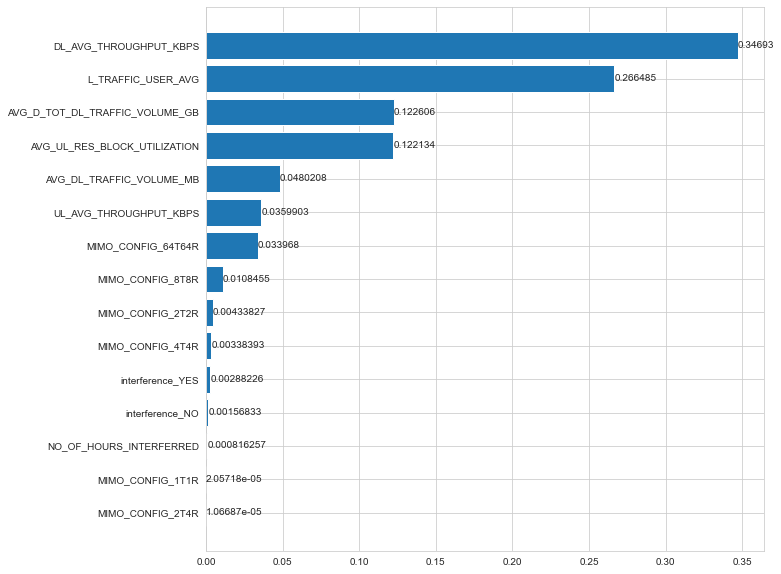

In [34]:
sorted_idx = rfimp.feature_importances_.argsort()

p1= plt.barh(X_smotenc_resample.columns[sorted_idx],rfimp.feature_importances_[sorted_idx] )
plt.bar_label(p1,label_type='edge')

In [35]:
#Selected_features_rc = np.array(X_smotenc_resample.columns)[rfimp.get_support()]
#Selected_features_rc
X_smotenc_resample.columns[sorted_idx]

Index(['MIMO_CONFIG_2T4R', 'MIMO_CONFIG_1T1R', 'NO_OF_HOURS_INTERFERRED',
       'interference_NO', 'interference_YES', 'MIMO_CONFIG_4T4R',
       'MIMO_CONFIG_2T2R', 'MIMO_CONFIG_8T8R', 'MIMO_CONFIG_64T64R',
       'UL_AVG_THROUGHPUT_KBPS', 'AVG_DL_TRAFFIC_VOLUME_MB',
       'AVG_UL_RES_BLOCK_UTILIZATION', 'AVG_D_TOT_DL_TRAFFIC_VOLUME_GB',
       'L_TRAFFIC_USER_AVG', 'DL_AVG_THROUGHPUT_KBPS'],
      dtype='object')

#### Xgboost importance

In [36]:
from xgboost import XGBClassifier

In [37]:
xgbimprt = XGBClassifier()
xgbimprt.fit(X_smotenc_resample, y_smotenc_resample)

[14:02:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
xgbimprt.feature_importances_

array([0.29163888, 0.01028436, 0.09279647, 0.33245128, 0.02090706,
       0.0339965 , 0.06783631, 0.02425547, 0.        , 0.        ,
       0.01762486, 0.        , 0.00991214, 0.03423809, 0.06405865],
      dtype=float32)

[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0.00991214'),
 Text(0, 0, '0.0102844'),
 Text(0, 0, '0.0176249'),
 Text(0, 0, '0.0209071'),
 Text(0, 0, '0.0242555'),
 Text(0, 0, '0.0339965'),
 Text(0, 0, '0.0342381'),
 Text(0, 0, '0.0640586'),
 Text(0, 0, '0.0678363'),
 Text(0, 0, '0.0927965'),
 Text(0, 0, '0.291639'),
 Text(0, 0, '0.332451')]

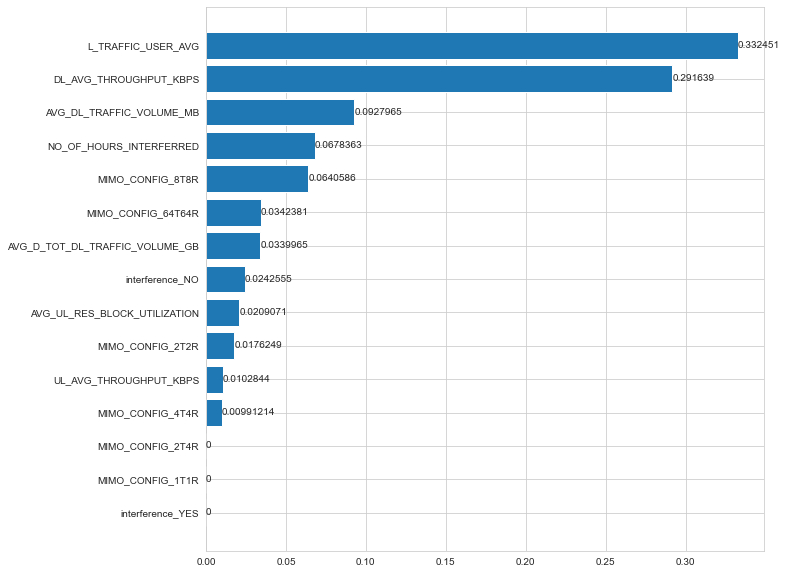

In [39]:
sorted_idxgb = xgbimprt.feature_importances_.argsort()

p1= plt.barh(X_smotenc_resample.columns[sorted_idxgb],xgbimprt.feature_importances_[sorted_idxgb] )
plt.bar_label(p1,label_type='edge')

In [40]:
X_smotenc_resample.columns[sorted_idxgb]

Index(['interference_YES', 'MIMO_CONFIG_1T1R', 'MIMO_CONFIG_2T4R',
       'MIMO_CONFIG_4T4R', 'UL_AVG_THROUGHPUT_KBPS', 'MIMO_CONFIG_2T2R',
       'AVG_UL_RES_BLOCK_UTILIZATION', 'interference_NO',
       'AVG_D_TOT_DL_TRAFFIC_VOLUME_GB', 'MIMO_CONFIG_64T64R',
       'MIMO_CONFIG_8T8R', 'NO_OF_HOURS_INTERFERRED',
       'AVG_DL_TRAFFIC_VOLUME_MB', 'DL_AVG_THROUGHPUT_KBPS',
       'L_TRAFFIC_USER_AVG'],
      dtype='object')

In [41]:
selected_colm_x = X_smotenc_resample[['interference_YES',
       'MIMO_CONFIG_4T4R', 'MIMO_CONFIG_64T64R', 'MIMO_CONFIG_8T8R',
       'UL_AVG_THROUGHPUT_KBPS', 'AVG_DL_TRAFFIC_VOLUME_MB',
       'AVG_UL_RES_BLOCK_UTILIZATION', 'AVG_D_TOT_DL_TRAFFIC_VOLUME_GB',
       'L_TRAFFIC_USER_AVG', 'DL_AVG_THROUGHPUT_KBPS']]

# selected_colm_x = X_smotenc_resample[['MIMO_CONFIG_2T2R',
#        'AVG_UL_RES_BLOCK_UTILIZATION', 'interference_NO',
#        'AVG_D_TOT_DL_TRAFFIC_VOLUME_GB', 'MIMO_CONFIG_64T64R',
#        'MIMO_CONFIG_8T8R', 'NO_OF_HOURS_INTERFERRED',
#        'AVG_DL_TRAFFIC_VOLUME_MB', 'DL_AVG_THROUGHPUT_KBPS',
#        'L_TRAFFIC_USER_AVG']]

selected_colm_y = y_smotenc_resample

## Random forest Algo with CV

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [43]:
Gridcvrfc = RandomForestClassifier()

In [44]:
rf_param_grid = { 'n_estimators': [5,10,50,100], 
                 'max_depth' : [4,5,6,7,8], 
                 'criterion' :['gini', 'entropy'],
                 'max_leaf_nodes' :[2,3,4,5,6] }

In [45]:
CV_rfc = GridSearchCV(Gridcvrfc, param_grid = rf_param_grid, cv= 5) 
CV_rfc.fit(selected_colm_x,selected_colm_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_leaf_nodes': [2, 3, 4, 5, 6],
                         'n_estimators': [5, 10, 50, 100]})

In [46]:
print('Best Score: %s' % CV_rfc.best_score_)
print('Best Hyperparameters: %s' % CV_rfc.best_params_)

Best Score: 0.9500036199088161
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 7, 'max_leaf_nodes': 6, 'n_estimators': 100}


In [47]:
#prediction score on test data
predict_grid_rfc = CV_rfc.predict(X_test[['interference_YES',
       'MIMO_CONFIG_4T4R', 'MIMO_CONFIG_64T64R', 'MIMO_CONFIG_8T8R',
       'UL_AVG_THROUGHPUT_KBPS', 'AVG_DL_TRAFFIC_VOLUME_MB',
       'AVG_UL_RES_BLOCK_UTILIZATION', 'AVG_D_TOT_DL_TRAFFIC_VOLUME_GB',
       'L_TRAFFIC_USER_AVG', 'DL_AVG_THROUGHPUT_KBPS']])
accuracy_score(y_test,predict_grid_rfc)

0.9388440860215054

In [48]:
print(classification_report(y_test,predict_grid_rfc))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      4089
           1       0.58      0.98      0.73       375

    accuracy                           0.94      4464
   macro avg       0.79      0.96      0.85      4464
weighted avg       0.96      0.94      0.95      4464



## Decision Algo with CV

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
Dt_param_grid = { 'min_samples_leaf': [2,3,4,5,6], 
                 'max_depth' : [4,5,6,7,8], 
                 'criterion' :['gini', 'entropy'],
                 'max_leaf_nodes' :[2,3,4,5,6] }

In [51]:
dt_grcv = DecisionTreeClassifier()
CV_dt = GridSearchCV(dt_grcv, param_grid = Dt_param_grid, cv= 5) 
CV_dt.fit(selected_colm_x,selected_colm_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_leaf_nodes': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [2, 3, 4, 5, 6]})

In [52]:
print('Best Score: %s' % CV_dt.best_score_)
print('Best Hyperparameters: %s' % CV_dt.best_params_)

Best Score: 0.9226037151256848
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 6, 'min_samples_leaf': 2}


In [53]:
#prediction score on test data
predict_grid_dt = CV_dt.predict(X_test[['interference_YES',
       'MIMO_CONFIG_4T4R', 'MIMO_CONFIG_64T64R', 'MIMO_CONFIG_8T8R',
       'UL_AVG_THROUGHPUT_KBPS', 'AVG_DL_TRAFFIC_VOLUME_MB',
       'AVG_UL_RES_BLOCK_UTILIZATION', 'AVG_D_TOT_DL_TRAFFIC_VOLUME_GB',
       'L_TRAFFIC_USER_AVG', 'DL_AVG_THROUGHPUT_KBPS']])
accuracy_score(y_test,predict_grid_dt)

0.9090501792114696

In [54]:
print(classification_report(y_test,predict_grid_dt))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      4089
           1       0.48      0.92      0.63       375

    accuracy                           0.91      4464
   macro avg       0.74      0.92      0.79      4464
weighted avg       0.95      0.91      0.92      4464



## Xgboost Algo with CV

In [55]:
import xgboost as xgb

In [56]:
xgbcv = xgb.XGBClassifier()

xg_param_grid = {'booster': ['gbtree','gblinear']}

In [57]:
CV_xg = GridSearchCV(xgbcv, param_grid = xg_param_grid, cv= 5) 
CV_xg.fit(selected_colm_x,selected_colm_y)

[14:11:06] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:11:07] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:11:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:11:10] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [58]:
print('Best Score: %s' % CV_xg.best_score_)
print('Best Hyperparameters: %s' % CV_xg.best_params_)

Best Score: 0.9871315463492367
Best Hyperparameters: {'booster': 'gbtree'}


In [59]:
#prediction score on test data
predict_grid_xg = CV_xg.predict(X_test[['interference_YES',
       'MIMO_CONFIG_4T4R', 'MIMO_CONFIG_64T64R', 'MIMO_CONFIG_8T8R',
       'UL_AVG_THROUGHPUT_KBPS', 'AVG_DL_TRAFFIC_VOLUME_MB',
       'AVG_UL_RES_BLOCK_UTILIZATION', 'AVG_D_TOT_DL_TRAFFIC_VOLUME_GB',
       'L_TRAFFIC_USER_AVG', 'DL_AVG_THROUGHPUT_KBPS']])
accuracy_score(y_test,predict_grid_xg)

0.9814068100358423

In [60]:
print(classification_report(y_test,predict_grid_xg))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4089
           1       0.85      0.95      0.90       375

    accuracy                           0.98      4464
   macro avg       0.92      0.97      0.94      4464
weighted avg       0.98      0.98      0.98      4464



## Adaboost Algo with CV

In [61]:
from sklearn.ensemble import AdaBoostClassifier

In [62]:
ada_param_grid = {'n_estimators' : [1,10,50,100],
                 'learning_rate' : [1,2]}
ada_grcv = AdaBoostClassifier()

In [63]:
adaboost_cv = GridSearchCV(ada_grcv, param_grid = ada_param_grid, cv= 5) 
adaboost_cv.fit(selected_colm_x,selected_colm_y)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [1, 2],
                         'n_estimators': [1, 10, 50, 100]})

In [64]:
print('Best Score: %s' % adaboost_cv.best_score_)
print('Best Hyperparameters: %s' % adaboost_cv.best_params_)

Best Score: 0.9761103264816609
Best Hyperparameters: {'learning_rate': 1, 'n_estimators': 100}


In [65]:
#prediction score on test data
predict_grid_ada = adaboost_cv.predict(X_test[['interference_YES',
       'MIMO_CONFIG_4T4R', 'MIMO_CONFIG_64T64R', 'MIMO_CONFIG_8T8R',
       'UL_AVG_THROUGHPUT_KBPS', 'AVG_DL_TRAFFIC_VOLUME_MB',
       'AVG_UL_RES_BLOCK_UTILIZATION', 'AVG_D_TOT_DL_TRAFFIC_VOLUME_GB',
       'L_TRAFFIC_USER_AVG', 'DL_AVG_THROUGHPUT_KBPS']])
accuracy_score(y_test,predict_grid_ada)

0.97334229390681

In [66]:
print(classification_report(y_test,predict_grid_ada))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      4089
           1       0.77      0.98      0.86       375

    accuracy                           0.97      4464
   macro avg       0.88      0.98      0.92      4464
weighted avg       0.98      0.97      0.97      4464



# Test with new data

In [74]:
#Read data set
new_data_set = pd.read_csv('TDD_CELL_SUMMARY_WEEK2022_02.csv')


# drop null value row boz there is small amount records with null, therefore it not give much affect to the final model
#(~1% with null)
test_clean_df = new_data_set.dropna()


#one hot endcoding technique
test_cell_interference= pd.get_dummies(test_clean_df.INTERFERENCE_AVAILABLE, prefix ='interference')
test_Mimo_config= pd.get_dummies(test_clean_df.MIMO_CONFIGURATION, prefix ='MIMO_CONFIG')

#convert target value into binary
test_clean_df['congested'] = np.where(test_clean_df['AVG_DL_RES_BLOCK_UTILIZATION'] >= 0.8, 1, 0)

#drop unwanted columns
test_unwanted_colum_dp = pd.concat([test_clean_df.drop(['AVG_DL_RES_BLOCK_UTILIZATION','L_TRAFFIC_USER_MAX','AVG_UL_TRAFFIC_VOLUME_MB','INTERFERENCE_AVAILABLE','MIMO_CONFIGURATION'],axis=1), test_cell_interference],axis=1)
test_unwanted_colum_dp_1 = pd.concat([test_unwanted_colum_dp,test_Mimo_config],axis=1)
test_unwanted_colum_dp_1.head()

#
test_catogorical_feature_list = [ 'interference_NO',
       'interference_YES', 'MIMO_CONFIG_1T1R', 'MIMO_CONFIG_2T2R',
       'MIMO_CONFIG_2T4R', 'MIMO_CONFIG_4T4R', 'MIMO_CONFIG_64T64R',
       'MIMO_CONFIG_8T8R']
test_cat_array = np.array(test_unwanted_colum_dp_1[catogorical_feature_list])


test_label = ['congested']
test_label_array = np.array(test_unwanted_colum_dp_1[label])
test_label_array

#normalized data using min max
t_min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0,1))
t_feature_after_min_max_scaler = t_min_max_scaler.fit_transform(test_unwanted_colum_dp_1.drop(['congested','interference_NO',
                                                    'interference_YES','MIMO_CONFIG_1T1R','MIMO_CONFIG_2T2R',
                                                    'MIMO_CONFIG_2T4R','MIMO_CONFIG_4T4R','MIMO_CONFIG_64T64R','MIMO_CONFIG_8T8R'],axis=1))

#append normalized data with categorical data                                                                     
t_feature_after_min_max_scaler
t_Min_max_data = np.concatenate([t_feature_after_min_max_scaler,test_cat_array,test_label_array], axis=1)
t_Min_max_data_final = pd.DataFrame(t_Min_max_data)

#rename all columns
t_Normalized_data = t_Min_max_data_final.rename(columns={0:"DL_AVG_THROUGHPUT_KBPS",
                                                    1:"UL_AVG_THROUGHPUT_KBPS",
                                                    2:"AVG_DL_TRAFFIC_VOLUME_MB",
                                                    3:"L_TRAFFIC_USER_AVG",
                                                    4:"AVG_UL_RES_BLOCK_UTILIZATION",
                                                    5:"AVG_D_TOT_DL_TRAFFIC_VOLUME_GB",
                                                    6:"NO_OF_HOURS_INTERFERRED",
                                                    7:"interference_NO",
                                                    8:"interference_YES",
                                                    9:"MIMO_CONFIG_1T1R",
                                                    10:"MIMO_CONFIG_2T2R",
                                                    11:"MIMO_CONFIG_2T4R",
                                                    12:"MIMO_CONFIG_4T4R",
                                                    13:"MIMO_CONFIG_64T64R",
                                                    14:"MIMO_CONFIG_8T8R",
                                                    15:"congested"})
t_Normalized_data['congested'] = t_Normalized_data.congested.astype(int)

In [75]:
selected_colm_x_test = t_Normalized_data[['interference_YES',
       'MIMO_CONFIG_4T4R', 'MIMO_CONFIG_64T64R', 'MIMO_CONFIG_8T8R',
       'UL_AVG_THROUGHPUT_KBPS', 'AVG_DL_TRAFFIC_VOLUME_MB',
       'AVG_UL_RES_BLOCK_UTILIZATION', 'AVG_D_TOT_DL_TRAFFIC_VOLUME_GB',
       'L_TRAFFIC_USER_AVG', 'DL_AVG_THROUGHPUT_KBPS']]


selected_colm_y_test = t_Normalized_data['congested']

In [76]:
selected_colm_y_test

0        0
1        0
2        0
3        0
4        0
        ..
14014    0
14015    0
14016    0
14017    0
14018    1
Name: congested, Length: 14019, dtype: int32

In [77]:
new_data_predict_xgb = CV_xg.predict(selected_colm_x_test)
accuracy_score(selected_colm_y_test,new_data_predict_xgb)

0.9652614309151866

In [78]:
print(classification_report(selected_colm_y_test,new_data_predict_xgb))
print(confusion_matrix(selected_colm_y_test,new_data_predict_xgb))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     12993
           1       0.69      0.94      0.80      1026

    accuracy                           0.97     14019
   macro avg       0.84      0.95      0.89     14019
weighted avg       0.97      0.97      0.97     14019

[[12568   425]
 [   62   964]]


In [82]:
t_Normalized_data[14014:14015]

,DL_AVG_THROUGHPUT_KBPS,UL_AVG_THROUGHPUT_KBPS,AVG_DL_TRAFFIC_VOLUME_MB,L_TRAFFIC_USER_AVG,AVG_UL_RES_BLOCK_UTILIZATION,AVG_D_TOT_DL_TRAFFIC_VOLUME_GB,NO_OF_HOURS_INTERFERRED,interference_NO,interference_YES,MIMO_CONFIG_1T1R,MIMO_CONFIG_2T2R,MIMO_CONFIG_2T4R,MIMO_CONFIG_4T4R,MIMO_CONFIG_64T64R,MIMO_CONFIG_8T8R,congested
14014,0.0708,0.084132,0.209612,0.18192,0.821554,0.185439,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [83]:
print("Label:" ,new_data_predict_xgb[14014:14015])

Label: [0]
